In [0]:
## importando as bibliotecas necessarias

## split de dataset
from sklearn.model_selection import train_test_split

## utilidades
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('darkgrid')
#plt.style.use('fivethirtyeight')

In [0]:
# i = []
# while(True):
#     i.append('a'*1000000000000)

## Conceitos iniciais - treino e teste

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
0,2,2.5,1.0,0.0,156.0,79.0,1035000.0
1,3,2.5,2.0,0.0,134.0,150.0,1465000.0
2,4,2.5,1.0,2.0,120.0,142.0,1600000.0
3,3,2.5,2.0,0.0,245.0,210.0,1876000.0
4,2,2.5,1.0,2.0,256.0,107.0,1636000.0


In [0]:
## verificando o tamanho
print(df.shape)

(9244, 7)


In [0]:
## verificando o tamanho de 4 partes iguais
9244 / 4

2311.0

In [0]:
## definindo X e y
X = df.drop('Price',axis=1)
y = df.Price

## splitando o dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [0]:
X_train

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea
7068,3,14.2,2.0,1.0,470.0,118.00
4982,1,5.4,1.0,1.0,0.0,62.00
665,5,10.7,3.0,2.0,915.0,233.00
5505,3,18.4,1.0,1.0,663.0,142.00
6277,3,17.2,1.0,1.0,653.0,119.00
...,...,...,...,...,...,...
5734,2,1.8,2.0,1.0,0.0,95.00
5191,4,17.2,1.0,1.0,842.0,160.00
5390,2,7.9,2.0,1.0,0.0,101.76
860,4,11.7,2.0,2.0,438.0,210.00


In [0]:
y_train

7068    1028800.0
4982     515000.0
665     2550000.0
5505     505000.0
6277     988000.0
          ...    
5734     785000.0
5191    1302000.0
5390     830000.0
860     1255000.0
7270    1175000.0
Name: Price, Length: 6933, dtype: float64

In [0]:
## verificando o shape dos datasets de treino e teste
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6933, 6) (6933,)
(2311, 6) (2311,)


## Regressão Linear Simples

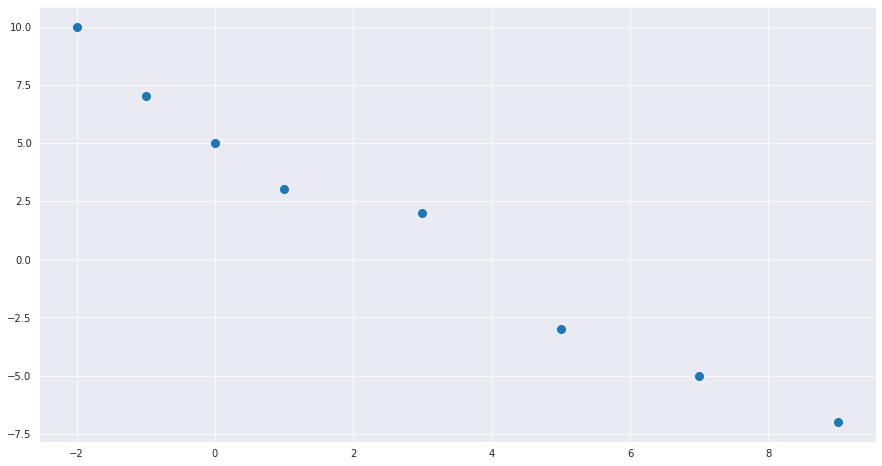

In [0]:
## verificando os dados para regressão linear simples

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100)
plt.show()

In [0]:
## verificando a correlação

np.corrcoef(x,y)

array([[ 1.        , -0.98727131],
       [-0.98727131,  1.        ]])

In [0]:
## conferindo o resultado do google sheets

from sklearn.linear_model import LinearRegression

x = np.array([-2,-1,0,1,3,5,7,9]).reshape(-1,1)
y = [10,7,5,3,2,-3,-5,-7]

lr = LinearRegression()
lr.fit(x,y)
lr.coef_, lr.intercept_

(array([-1.49771689]), 5.6187214611872145)

In [0]:
## utilizando o predict

lr.predict([[1]])

array([4.12100457])

In [0]:
## gerando várias predições

for i in range(10):
  print(f'Predizendo para x={i} -- Resultado {lr.predict([[i]])}')

Predizendo para x=0 -- Resultado [5.61872146]
Predizendo para x=1 -- Resultado [4.12100457]
Predizendo para x=2 -- Resultado [2.62328767]
Predizendo para x=3 -- Resultado [1.12557078]
Predizendo para x=4 -- Resultado [-0.37214612]
Predizendo para x=5 -- Resultado [-1.86986301]
Predizendo para x=6 -- Resultado [-3.36757991]
Predizendo para x=7 -- Resultado [-4.8652968]
Predizendo para x=8 -- Resultado [-6.3630137]
Predizendo para x=9 -- Resultado [-7.86073059]


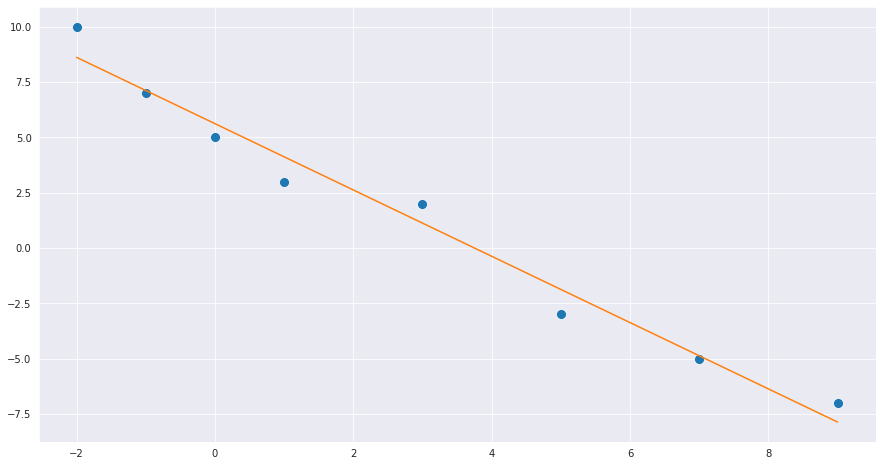

In [0]:
## verificando o modelo montado

x = [-2,-1,0,1,3,5,7,9]
y = [10,7,5,3,2,-3,-5,-7]

y_pred = [lr.predict([[x]])[0] for x in x]

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100)
sns.lineplot(x=x,y=y_pred,color='tab:orange')
plt.show()

Vamos dividir o dataset em treino e teste na mão! E treina-lo somente com TREINO.

In [0]:
## separando em treino e teste (0.25)

x_test = np.array([0,1]).reshape(-1,1)
y_test = [5,3]

x_treino = np.array([-2,-1,3,5,7,9]).reshape(-1,1)
y_treino = [10,7,2,-3,-5,-7]

lr2 = LinearRegression()
lr2.fit(x_treino,y_treino)
lr2.coef_, lr.intercept_

(array([-1.54973822]), 5.6187214611872145)

In [0]:
## utilizando predict

print(y_test)
lr2.predict(x_test)

[5, 3]


array([6.09075044, 4.54101222])

In [0]:
## definido nosso_mean_squared_error

def nosso_mean_squared_error(y_real,y_pred): 
  return ((y_real - y_pred)**2).mean()

In [0]:
## calculando nosso_mean_squared_error

valores_reais_de_y = np.array([5,3])
valores_preditos_de_y = np.array([6.09075044, 4.54101222])

nosso_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.7822275922747606

In [0]:
## usando a API do sklearn

from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,lr2.predict(x_test))

1.782227582699063

In [0]:
## definido nosso_ROOT_mean_squared_error

def nosso_ROOT_mean_squared_error(y_real,y_pred): 
  return np.sqrt(((y_real - y_pred)**2).mean())

In [0]:
## calculando nosso_ROOT_mean_squared_error
## não tem no sklearn

nosso_ROOT_mean_squared_error(valores_reais_de_y,valores_preditos_de_y)

1.3350009708890704

In [0]:
## vamos tentar calcular o erro de treino

print(nosso_mean_squared_error(y_treino,lr2.predict(x_treino)))
print(nosso_ROOT_mean_squared_error(y_treino,lr2.predict(x_treino)))

0.662012798138453
0.8136416890366748


## Regressão Linear Múltipla (Melbourne)

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')
df.head()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
0,2,2.5,1.0,0.0,156.0,79.0,1035000.0
1,3,2.5,2.0,0.0,134.0,150.0,1465000.0
2,4,2.5,1.0,2.0,120.0,142.0,1600000.0
3,3,2.5,2.0,0.0,245.0,210.0,1876000.0
4,2,2.5,1.0,2.0,256.0,107.0,1636000.0


In [0]:
## descrevendo o dataset

df.describe()

,Rooms,Distance,Bathroom,Car,Landsize,BuildingArea,Price
count,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9244.000000,9.244000e+03
mean,3.098118,11.241151,1.652423,1.695370,528.833838,156.994628,1.092329e+06
std,0.964029,6.882570,0.724991,0.975529,1212.965090,480.976260,6.796212e+05
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.310000e+05
25%,2.000000,6.400000,1.000000,1.000000,210.000000,100.000000,6.410000e+05
50%,3.000000,10.300000,2.000000,2.000000,474.000000,132.000000,9.000000e+05
75%,4.000000,13.900000,2.000000,2.000000,651.000000,181.000000,1.341250e+06
max,12.000000,48.100000,9.000000,10.000000,44500.000000,44515.000000,9.000000e+06


In [0]:
## range de Price

df.Price.max() - df.Price.min()

8869000.0

In [0]:
## verificando valores nulos
df.isna().sum()

Rooms           0
Distance        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
Price           0
dtype: int64

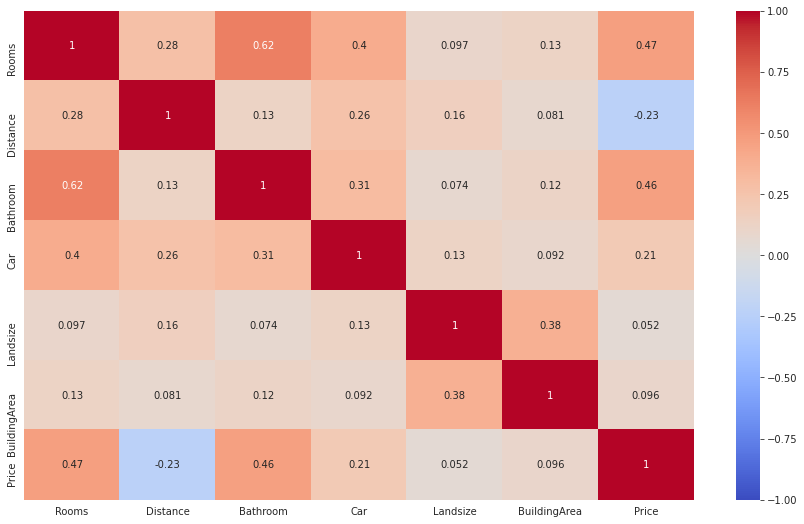

In [0]:
## verificando as correlações
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

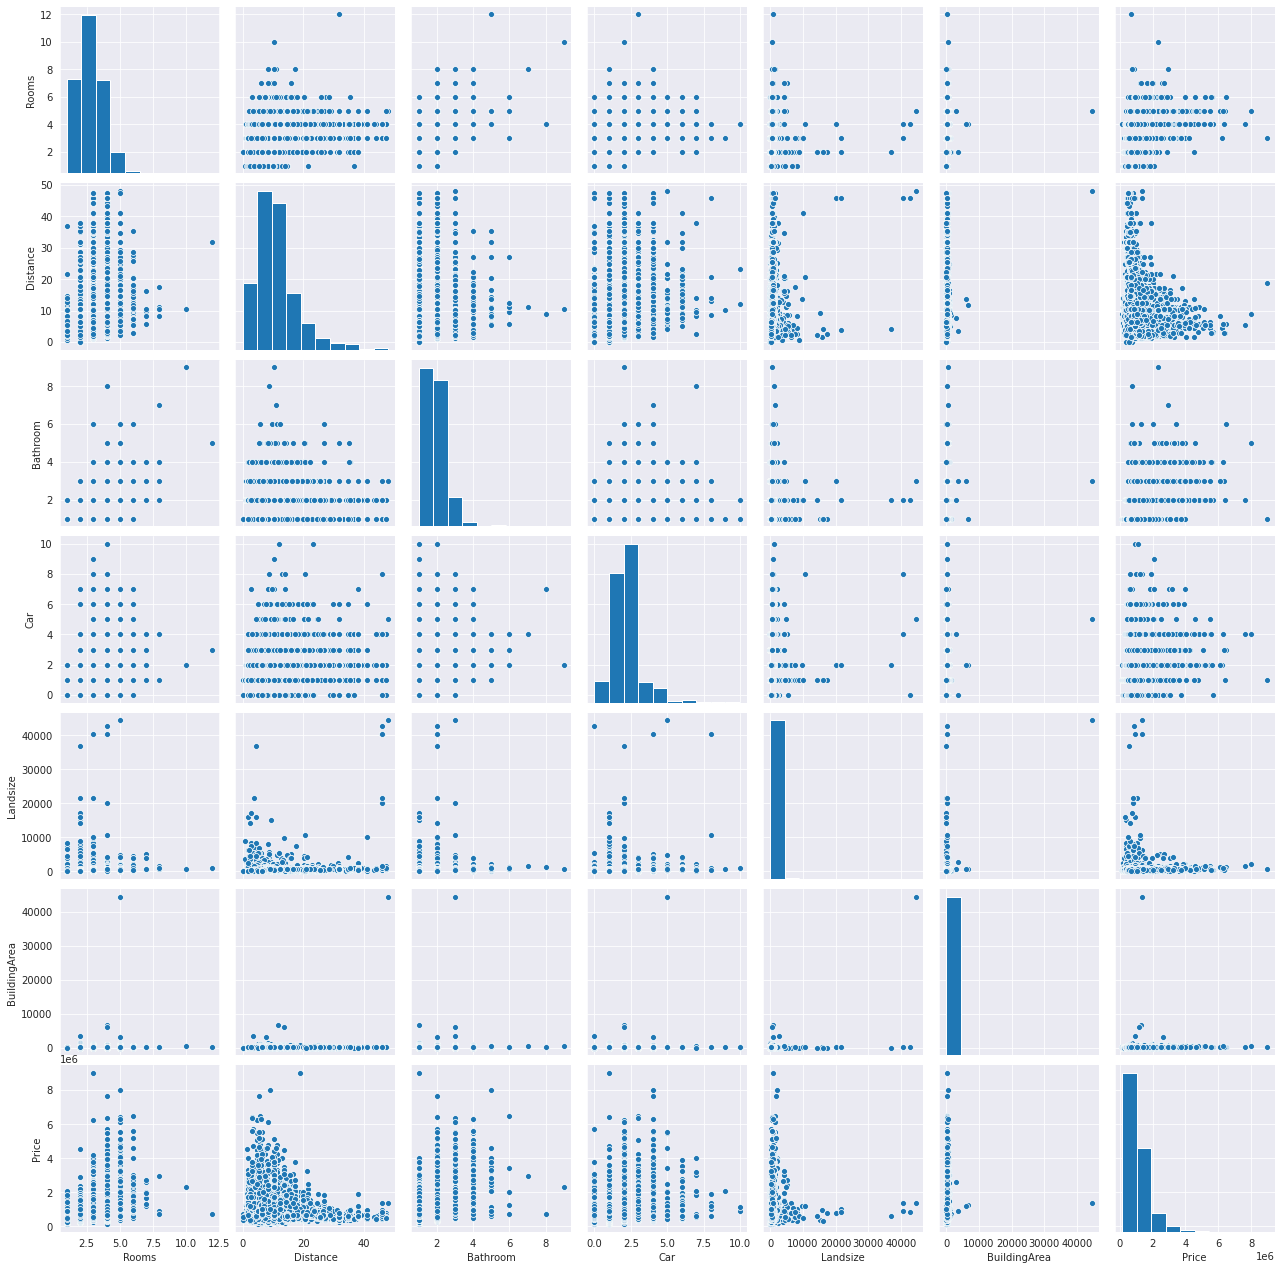

In [0]:
sns.pairplot(df)

In [0]:
## splitando o dataset

x = df.drop(['Price'],axis=1)
y = df.Price

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(6933, 6) (6933,)
(2311, 6) (2311,)


In [0]:
## treinando um modelo de regressão linear multipla

lr = LinearRegression()
lr.fit(x_train,y_train)
lr.coef_

array([ 2.91937337e+05, -3.96883189e+04,  2.14182464e+05,  4.81893042e+04,
        1.75684873e+01,  3.29228029e+01])

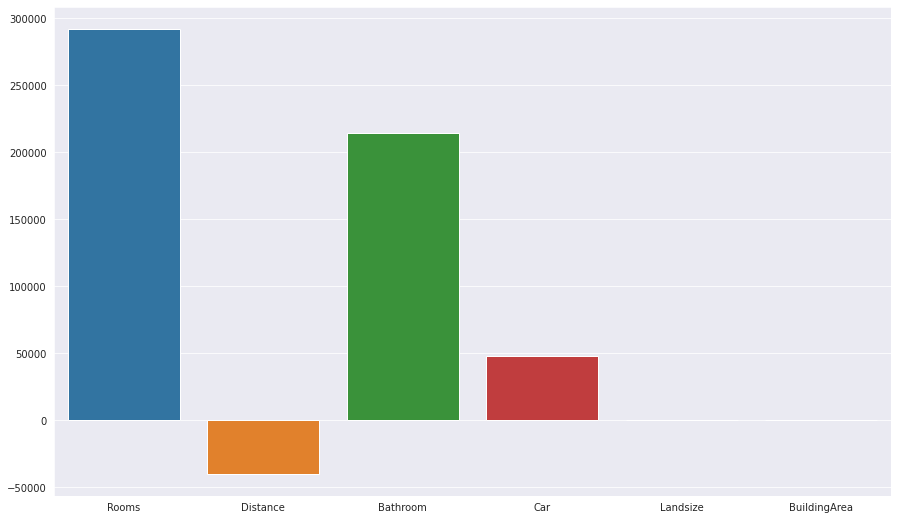

In [0]:
## verificando os pesos

plt.figure(figsize=(15,9))
sns.barplot(x = x_train.columns,y = lr.coef_)
plt.show()

In [0]:
## MSE de teste do modelo

y_pred = lr.predict(x_test)
mean_squared_error(y_test,y_pred)

280083847108.7673

In [0]:
## RMSE de teste do modelo

np.sqrt(mean_squared_error(y_test,y_pred))

529229.4843532125

In [0]:
## r2 de teste do modelo

lr.score(x_test,y_test)

0.385704077883528

In [0]:
## comparando com a API

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.385704077883528

In [0]:
## avaliação no treino

y_pred_train = lr.predict(x_train)
print(mean_squared_error(y_train,y_pred_train))
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(lr.score(x_train,y_train))

270073031034.8642
519685.511665338
0.4176840683710384


## Demonstrando r2

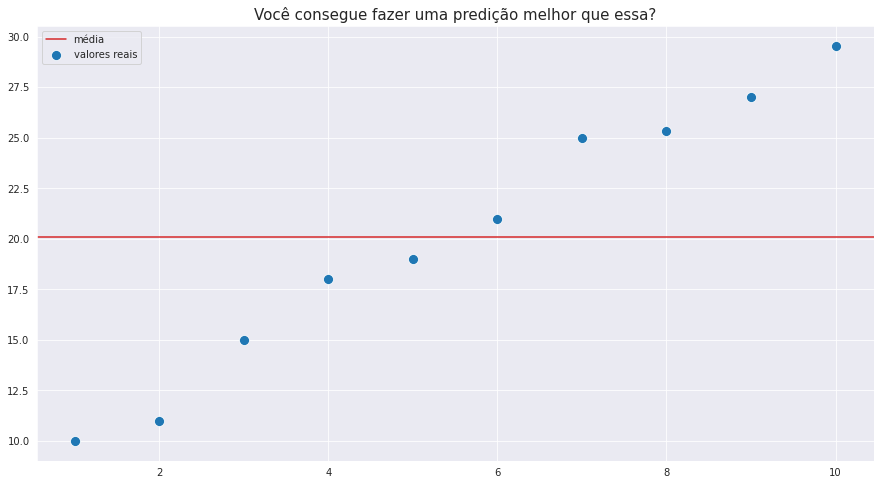

In [0]:
## demonstrando r2

x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([10,11,15,18,19,21,25,25.33,27,29.55])

plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
plt.axhline(y.mean(),color='tab:red',label='média')
plt.title('Você consegue fazer uma predição melhor que essa?',size=15)
plt.legend()
plt.show()

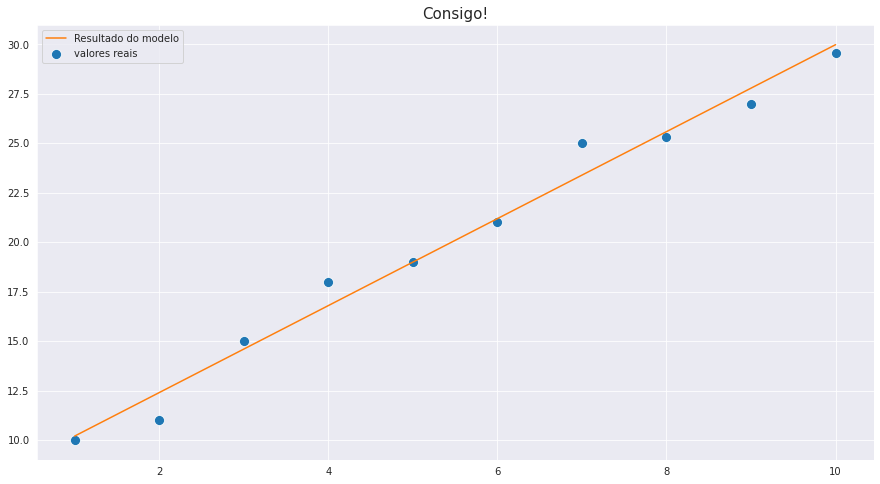

In [0]:
## valores reais
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([10,11,15,18,19,21,25,25.33,27,29.55])

## valor predito
y_pred = np.array([10.19890909, 12.39648485, 14.59406061, 16.79163636, 18.98921212,21.18678788, 23.38436364, 25.58193939, 27.77951515, 29.97709091])

## gráfico
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
sns.lineplot(x=x,y=y_pred,label='Resultado do modelo',color='tab:orange')
plt.title('Consigo!',size=15)
plt.legend()
plt.show()

In [0]:
## definindo nosso_r2

def nosso_r2(y_true,y_pred):

  med = y_true.mean()

  ssreg = sum((y_true - y_pred)**2)
  sstotal = sum((y_true - med)**2)

  return 1-(ssreg/sstotal)

In [0]:
## conferindo o r2 do modelo
nosso_r2(y,y_pred)

0.9824589902504507

In [0]:
## comparando resultado com a API do sklearn
r2_score(y,y_pred)

0.9824589902504507

## Regressão Polinomial

In [0]:
## definindo a função

def val_model(y_true,y_pred):
  print('x-x-x PRINTING METRICS FOR THE MODEL x-x-x')
  print('--'*30)
  print(f'MEAN SQUARE ERROR      : {mean_squared_error(y_true,y_pred)}')
  print(f'ROOT MEAN SQUARE ERROR : {np.sqrt(mean_squared_error(y_true,y_pred))}')
  print(f'R2                     : {r2_score(y_true,y_pred)}')

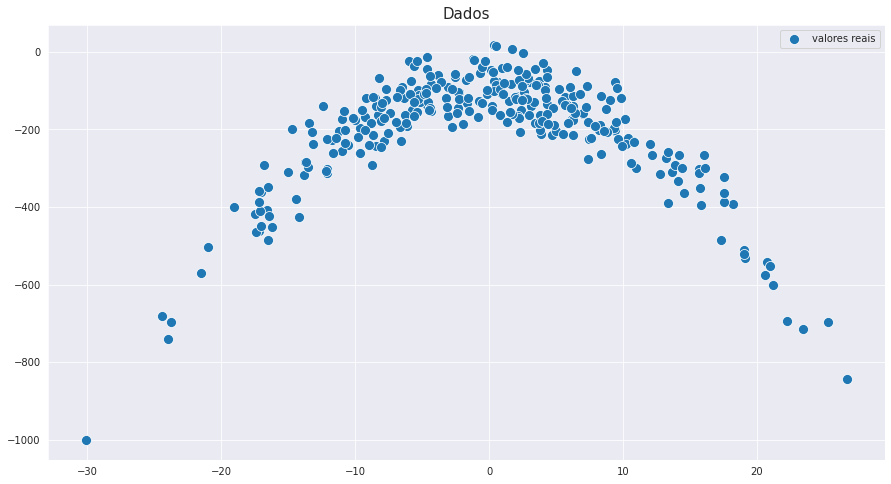

In [0]:
## plotando os dados
x=10*np.random.normal(0,1,300)
y=(-x**2)+np.random.normal(-100,50,300)
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='valores reais')
plt.title('Dados',size=15)
plt.legend()
plt.show()

In [0]:
## treinando um modelo linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

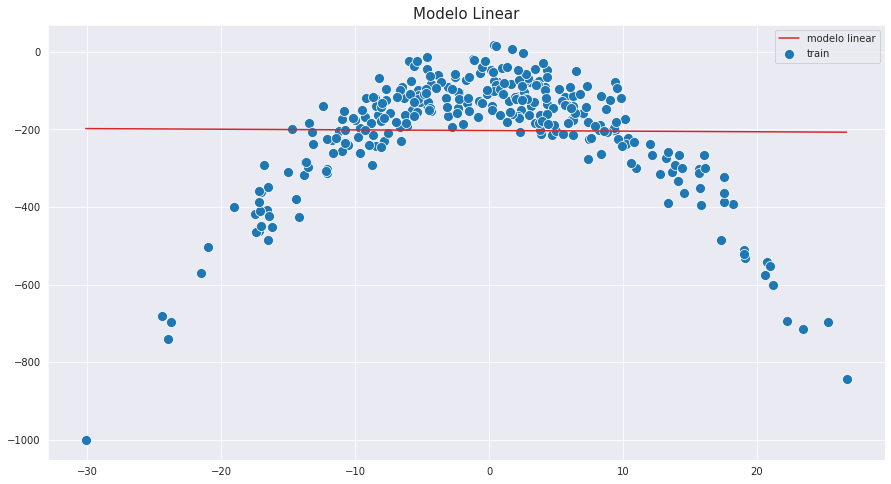

In [0]:
## plotando o modelo linear
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='train',color='tab:blue')
sns.lineplot(x = x, y = lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'tab:red')
plt.title('Modelo Linear',size=15)
plt.legend()
plt.show()

In [0]:
## avaliando o modelo

y_pred = lr.predict(x.reshape(-1,1))

val_model(y,y_pred)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARE ERROR      : 22469.546237927352
ROOT MEAN SQUARE ERROR : 149.8984530871728
R2                     : 0.00011951644286400942


In [0]:
## criando as features polinominais

from sklearn.preprocessing import PolynomialFeatures

pol_transformer = PolynomialFeatures(degree=2)
x_poly = pol_transformer.fit_transform(x.reshape(-1,1))

In [0]:
x_poly

array([[ 1.00000000e+00,  1.20325206e+01,  1.44781552e+02],
       [ 1.00000000e+00, -9.27867875e+00,  8.60938793e+01],
       [ 1.00000000e+00,  1.56642819e+01,  2.45369727e+02],
       [ 1.00000000e+00,  8.38412263e+00,  7.02935123e+01],
       [ 1.00000000e+00,  3.11044205e+00,  9.67484972e+00],
       [ 1.00000000e+00,  7.01163130e+00,  4.91629735e+01],
       [ 1.00000000e+00, -5.96223740e+00,  3.55482748e+01],
       [ 1.00000000e+00,  8.78479523e+00,  7.71726272e+01],
       [ 1.00000000e+00, -4.61471465e+00,  2.12955913e+01],
       [ 1.00000000e+00, -2.22992504e+00,  4.97256567e+00],
       [ 1.00000000e+00,  9.02772006e+00,  8.14997294e+01],
       [ 1.00000000e+00, -1.17031549e+01,  1.36963834e+02],
       [ 1.00000000e+00,  5.64310013e+00,  3.18445790e+01],
       [ 1.00000000e+00, -1.62175080e+00,  2.63007566e+00],
       [ 1.00000000e+00,  7.02796216e+00,  4.93922521e+01],
       [ 1.00000000e+00,  8.35635901e+00,  6.98287359e+01],
       [ 1.00000000e+00, -8.19939097e+00

In [0]:
## treinando um modelo com features polinomiais

lr_poly = LinearRegression()
lr_poly.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

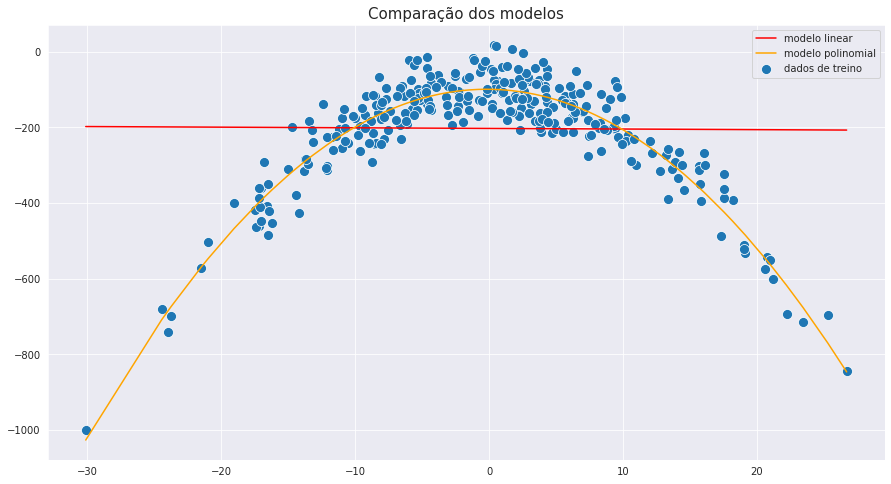

In [0]:
## plotando tudo junto
plt.figure(figsize=(15,8))
sns.scatterplot(x=x,y=y,s=100,label='dados de treino',color='tab:blue')
sns.lineplot(x = x, y = lr.predict(x.reshape(-1,1)),label='modelo linear',color = 'r')

##definindo polypred
poly_pred = lr_poly.predict(x_poly)
sorted_zip = sorted(zip(x,poly_pred))
x_poly_graph, poly_pred = zip(*sorted_zip)

## plotando o modelo polinomial
sns.lineplot(x = x_poly_graph, y = poly_pred,label='modelo polinomial',color = 'orange')
plt.title('Comparação dos modelos',size=15)
plt.legend()
plt.show()

In [0]:
## avaliando o modelo polinomial

y_pred = lr_poly.predict(x_poly)

val_model(y,y_pred)

x-x-x PRINTING METRICS FOR THE MODEL x-x-x
------------------------------------------------------------
MEAN SQUARE ERROR      : 2652.465900065143
ROOT MEAN SQUARE ERROR : 51.5020960744817
R2                     : 0.8819669583580968


In [0]:
## polynomial regression + pipeline

from sklearn.pipeline import Pipeline

val_score = {}

for i in range(2,15):
  steps = [('poly',PolynomialFeatures(degree=i)),('model',LinearRegression())]
  pipe = Pipeline(steps)
  pipe.fit(x.reshape(-1,1),y)
  y_pred = pipe.predict(x.reshape(-1,1))
  val_score[i] = [r2_score(y,y_pred),np.sqrt(mean_squared_error(y,y_pred))]

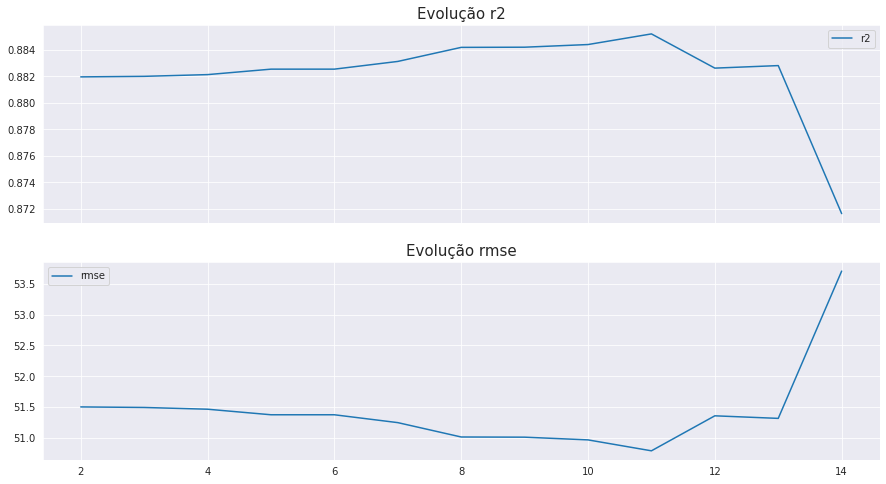

In [0]:
## plotando

f, ax = plt.subplots(2,1,figsize=(15,8),sharex=True)

sns.lineplot(x = list(val_score.keys()), y = [val_score[key][0] for key in val_score.keys()],label='r2',ax=ax[0])
sns.lineplot(x = list(val_score.keys()), y = [val_score[key][1] for key in val_score.keys()],label='rmse',ax=ax[1])

ax[0].set_title('Evolução r2',size=15)
ax[1].set_title('Evolução rmse',size=15)

plt.legend()
plt.show()

## Melhorando o modelo das casas de melbourne

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')

## separando x e y
x = df.drop(['Price'],axis=1)
y = df.Price

In [0]:
train_error = []
test_error = []

for i in range(2,7):

  ## transformando x
  poly = PolynomialFeatures(i)
  x_poly = poly.fit_transform(x)

  ## splitando o dataset
  x_train, x_test, y_train, y_test = train_test_split(x_poly,y,test_size=0.25,random_state=42)

  ## treinando para I
  regressor = LinearRegression()
  regressor.fit(x_train,y_train)

  ## avaliando o erro no test
  y_pred = regressor.predict(x_test)
  test_error.append(mean_squared_error(y_test,y_pred))

  ## avaliando o erro no treino
  train_error.append(mean_squared_error(y_train,regressor.predict(x_train)))

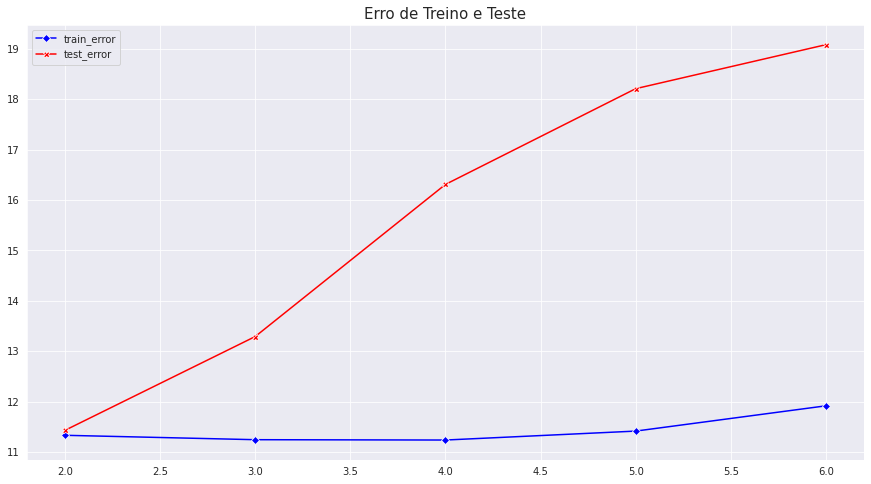

In [0]:
## plotando os erros de treino e teste

plt.figure(figsize=(15,8))

train_error = np.log10(train_error)
test_error = np.log10(test_error)

sns.lineplot(x=list(range(2,7)),y=train_error,label='train_error',color='b',marker='D')
sns.lineplot(x=list(range(2,7)),y=test_error,label='test_error',color='r',marker='X')

plt.title('Erro de Treino e Teste',size=15)
plt.legend()
plt.show()

## Cross Validation

Avaliando vários modelos.

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
## lendo o dataset
df = pd.read_csv('/content/regression_dataset01_melbourne.csv',sep=';')

## separando x e y
x = df.drop(['Price'],axis=1)
y = df.Price

In [0]:
## transformando as features

poly = PolynomialFeatures(2)
poly_x = poly.fit_transform(x)

In [0]:
## usando o cross_val_score

modelo = LinearRegression()

(cross_val_score(modelo,poly_x,y,cv=10,scoring='neg_root_mean_squared_error')*-1)

array([  619200.10656456,   682525.52206306,   445777.64908942,
         475269.26617279,   457163.61645115,   464021.39558731,
         474859.59521624, 52034423.72453149,   699837.18128355,
         480217.26898749])

In [0]:
## testando para vários 'i' em Polynomial features

data = []

for i in range(2,7):
  poly = PolynomialFeatures(i)
  poly_x = poly.fit_transform(x)

  modelo = LinearRegression()
  data.append((cross_val_score(modelo,poly_x,y,cv=10,scoring='neg_root_mean_squared_error')*-1).mean())

In [0]:
np.log10(data)

array([ 6.75460284,  8.46559229, 11.19852639, 13.52732512, 15.34056271])

In [0]:
## usando cross_val_score para comparar modelos

from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor

def train_models(x,y,cv):

  error = pd.DataFrame([])

  ## val dummy
  dummy = DummyRegressor('mean')
  error['dummy'] = (cross_val_score(dummy,x,y,cv=cv,scoring='neg_root_mean_squared_error')*-1)

  ## val LinearModel
  linear = LinearRegression()
  error['linear'] = (cross_val_score(linear,x,y,cv=cv,scoring='neg_root_mean_squared_error')*-1)
  
  ## val DecisionTree
  dt_reg = DecisionTreeRegressor(max_depth=5,max_features=4,min_samples_leaf=5)
  error['tree'] = (cross_val_score(dt_reg,x,y,cv=cv,scoring='neg_root_mean_squared_error')*-1)

  error = error.transpose()
  error = error.assign(mean = lambda x: x.mean(axis=1))
  
  return error

In [0]:
## usando a função acima com cv=10

train_models(x,y,10)

,0,1,2,3,4,5,6,7,8,9,mean
dummy,784306.612226,698247.389687,661360.050102,676198.254000,653301.300146,650153.677900,629790.335595,6.538235e+05,698214.415453,694662.313112,680005.787171
linear,564942.533584,487885.628974,496423.165099,518130.647738,508954.320359,506795.844679,528893.603905,1.016350e+06,566997.409849,536114.437184,573148.766877
tree,569315.936791,478115.267263,476142.742621,486865.434540,452373.551739,430812.711998,463215.063850,5.032202e+05,493477.778077,451514.468756,480505.313436


## Decision Trees

In [0]:
## demonstrando valores de entropia

from scipy.stats import entropy

data = []

for i in range(11):
  data.append(entropy([i/10,(10-i)/10],base=2))

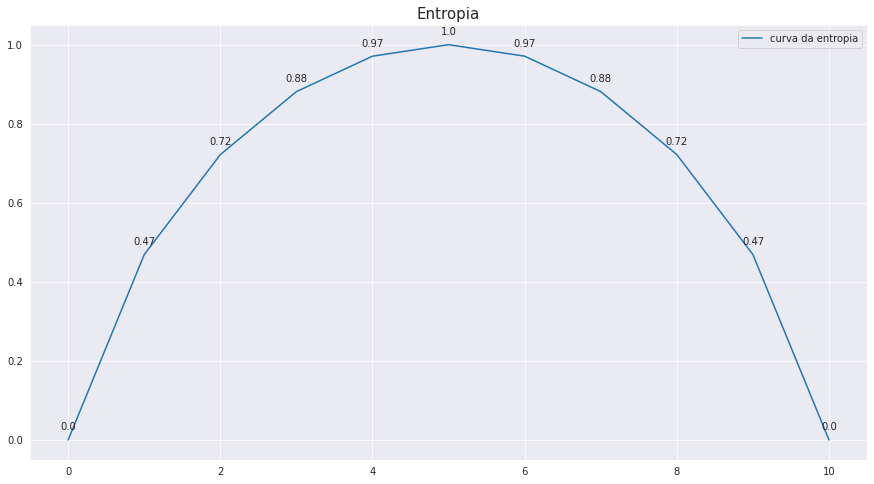

In [0]:
## plotando entropia

plt.figure(figsize=(15,8))
sns.lineplot(x=list(range(11)),y=data,label='curva da entropia')

for i,value in enumerate(data):
  plt.text(x = i , y = value + 0.02, s = round(value,2),horizontalalignment='center',verticalalignment='bottom')

plt.title('Entropia',size=15)
plt.show()

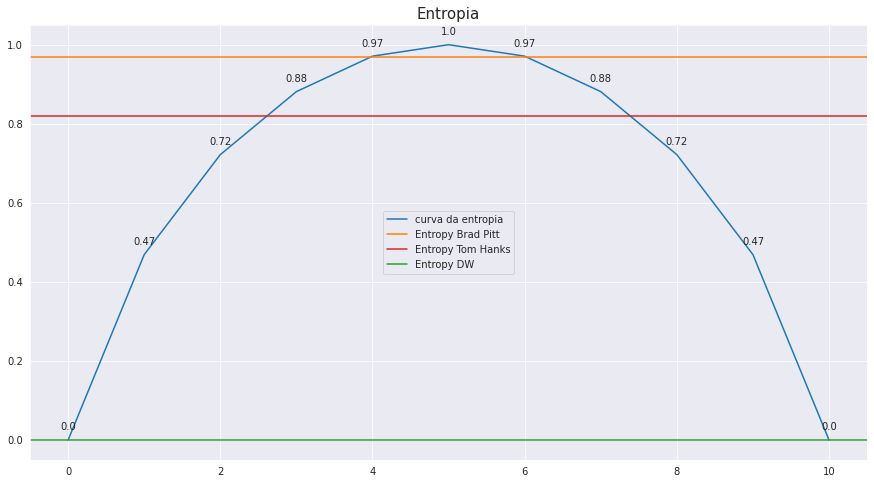

In [0]:
## plotando os 3 atores

plt.figure(figsize=(15,8))
sns.lineplot(x=list(range(11)),y=data,label='curva da entropia')

for i,value in enumerate(data):
  plt.text(x = i , y = value + 0.02, s = round(value,2),horizontalalignment='center',verticalalignment='bottom')

plt.axhline(y=0.97,label = 'Entropy Brad Pitt', color='tab:orange')
plt.axhline(y=0.82,label = 'Entropy Tom Hanks', color='tab:red')
plt.axhline(y=0.0,label = 'Entropy DW', color='tab:green')

plt.legend()
plt.title('Entropia',size=15)
plt.show()

In [0]:
## lendo o dataset

import pandas as pd
df = pd.read_csv('/content/decision_tree_example - Página1.csv')
df.head()

,Filme,Ator,Categoria,Avaliação,Assistiu?
0,Bastador Inglórios,Brad Pitt,Ação,Mediana,Não
1,Porcos e Diamantes,Brad Pitt,Ação,Mediana,Não
2,Tróia,Brad Pitt,Ação,Baixa,Não
3,O curioso caso de Benjamin Button,Brad Pitt,Drama,Mediana,Não
4,Sr e Sra Smith,Brad Pitt,Romance,Baixa,Não


In [0]:
## definindo X e Y
x = df.drop(['Filme','Assistiu?'],axis=1)
y = df['Assistiu?']

In [0]:
## importando o modelo
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [0]:
## treinando

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

ValueError: ignored

In [0]:
## fatorizando a coluna Ator

pd.factorize(x['Ator'])

(array([0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2]),
 Index(['Brad Pitt', 'Denzel Washington', 'Tom Hanks'], dtype='object'))

In [0]:
## fatorizando a coluna Categoria

pd.factorize(x['Categoria'])

(array([0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2]),
 Index(['Ação', 'Drama', 'Romance'], dtype='object'))

In [0]:
## fatorizando a coluna Avaliação

pd.factorize(x['Avaliação'])

(array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2]),
 Index(['Mediana', 'Baixa', 'Excepcional'], dtype='object'))

In [0]:
for feature in x.columns:
  x[feature] = pd.factorize(x[feature])[0]

In [0]:
x.head()

,Ator,Categoria,Avaliação
0,0,0,0
1,0,0,0
2,0,0,1
3,0,1,0
4,0,2,1


In [0]:
## treinando

dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
## classes

dt.classes_

array(['Não', 'Sim'], dtype=object)

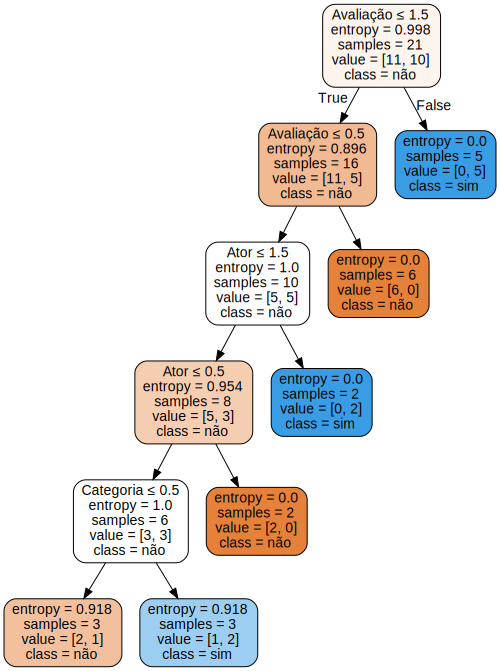

In [0]:
import graphviz

# dot is a graph description language
dot = tree.export_graphviz(dt, out_file=None, 
                           feature_names=x.columns.values,  
                           class_names=["não", "sim"],  
                           filled=True, rounded=True,  
                           special_characters=True) 

# we create a graph from dot source using graphviz.Source
graph = graphviz.Source(dot) 
graph

In [0]:
## inspecionando a importância das features

print(dt.feature_importances_)
print(x.columns)

[0.25880148 0.03171774 0.70948078]
Index(['Ator', 'Categoria', 'Avaliação'], dtype='object')


In [0]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição baixa

dt.predict([[0,2,1]])

array([[1., 0.]])

In [0]:
## predizendo o resultado para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict([[0,2,0]])

array([[0.33333333, 0.66666667]])

In [0]:
## avaliando as probabilidades para um filme do Brad Pitt, de romance, de avalição baixa

dt.predict_proba([[0,2,1]])

array([[1., 0.]])

In [0]:
## avaliando as probabilidades para um filme do Brad Pitt, de romance, de avalição mediana

dt.predict_proba([[0,2,0]])

array([[0.33333333, 0.66666667]])

## Random Forest + Titanic

In [0]:
## dataset

df = pd.read_csv('/content/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
## Seprando X e Y

x = df.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y = df.Survived

In [0]:
## Valores nulos

x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
## separando features

cat_features = ['Pclass','Sex','Embarked']
num_features = ['Age','SibSp','Parch','Fare']

In [0]:
## criando os passos

steps_cat = [('imputer_cat',SimpleImputer(strategy='most_frequent')),('ohe',OneHotEncoder())]
steps_num = [('imputer_num',SimpleImputer(strategy='mean'))]

## criando os pipelines

pipe_cat = Pipeline(steps_cat)
pipe_num = Pipeline(steps_num)

In [0]:
## criando o column transformer

transformers = [('cat',pipe_cat,cat_features),
                ('num',pipe_num,num_features)]

col_transf = ColumnTransformer(transformers)

In [0]:
## criando o pipeline final

pipe_final = Pipeline(steps=[('pre_processing',col_transf),('random',RandomForestClassifier())])

In [0]:
## Comparando modelos

def compare_models(model1,model2,x,y,cv):
  print('-- COMPARING MODELS --')
  print(f'Model 1 : {cross_val_score(model1,X=x,y=y,cv=cv).mean()}')
  print(f'Model 2 : {cross_val_score(model2,X=x,y=y,cv=cv).mean()}')

In [0]:
## qual modelo é o melhor?

compare_models(DummyClassifier(strategy='most_frequent'),pipe_final,x,y,cv=10)

-- COMPARING MODELS --
Model 1 : 0.616167290886392
Model 2 : 0.8103995006242197


In [0]:
## verificando os parâmetros que podem ser procurados com GridSearchCV

pipe_final.get_params()

{'memory': None,
 'pre_processing': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('cat',
                                  Pipeline(memory=None,
                                           steps=[('imputer_cat',
                                                   SimpleImputer(add_indicator=False,
                                                                 copy=True,
                                                                 fill_value=None,
                                                                 missing_values=nan,
                                                                 strategy='most_frequent',
                                                                 verbose=0)),
                                                  ('ohe',
                                                   OneHotEncoder(categories='auto',
                                             

In [0]:
param_grid = {'random__n_estimators': [100,200,300,400,500],
              'random__max_depth': [5,6,7,8,9,10],
              'random__criterion': ['entropy'],
              'random__min_samples_leaf': [5,10,15],
              'random__class_weight': [None,'balanced'],
              'random__random_state': [42],
              'pre_processing__num__imputer_num__strategy': ['mean','median','most_frequent']}

grid = GridSearchCV(pipe_final,param_grid=param_grid,cv=10,n_jobs=-1)
grid.fit(x,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pre_processing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer_cat',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                             

In [0]:
## criando o dataframe de grid

grid_df = pd.DataFrame(grid.cv_results_)
grid_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pre_processing__num__imputer_num__strategy,param_random__class_weight,param_random__criterion,param_random__max_depth,param_random__min_samples_leaf,param_random__n_estimators,param_random__random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.272999,0.004418,0.021873,0.000432,mean,None,entropy,5,5,100,42,{'pre_processing__num__imputer_num__strategy':...,0.788889,0.820225,0.752809,0.887640,0.853933,0.786517,0.797753,0.775281,0.865169,0.808989,0.813720,0.040734,203
1,0.523070,0.008928,0.036811,0.001988,mean,None,entropy,5,5,200,42,{'pre_processing__num__imputer_num__strategy':...,0.788889,0.820225,0.752809,0.898876,0.887640,0.808989,0.808989,0.775281,0.865169,0.808989,0.821586,0.045451,69
2,0.773625,0.004511,0.050269,0.001328,mean,None,entropy,5,5,300,42,{'pre_processing__num__imputer_num__strategy':...,0.800000,0.820225,0.752809,0.898876,0.842697,0.808989,0.808989,0.775281,0.865169,0.808989,0.818202,0.040028,100
3,1.022955,0.009185,0.065542,0.004695,mean,None,entropy,5,5,400,42,{'pre_processing__num__imputer_num__strategy':...,0.800000,0.820225,0.752809,0.898876,0.876404,0.808989,0.808989,0.775281,0.865169,0.808989,0.821573,0.043240,75
4,1.266938,0.004683,0.079497,0.003507,mean,None,entropy,5,5,500,42,{'pre_processing__num__imputer_num__strategy':...,0.800000,0.820225,0.752809,0.898876,0.876404,0.808989,0.808989,0.775281,0.865169,0.808989,0.821573,0.043240,75


In [0]:
## avaliando o shape

grid_df.shape

(540, 25)

In [0]:
## colunas

grid_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_pre_processing__num__imputer_num__strategy',
       'param_random__class_weight', 'param_random__criterion',
       'param_random__max_depth', 'param_random__min_samples_leaf',
       'param_random__n_estimators', 'param_random__random_state', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'split5_test_score',
       'split6_test_score', 'split7_test_score', 'split8_test_score',
       'split9_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

In [0]:
## achando o melhor

grid_df.sort_values('rank_test_score',ascending=True).iloc[0,:]

mean_fit_time                                                                                 1.09208
std_fit_time                                                                               0.00676912
mean_score_time                                                                             0.0652174
std_score_time                                                                            0.000871897
param_pre_processing__num__imputer_num__strategy                                                 mean
param_random__class_weight                                                                       None
param_random__criterion                                                                       entropy
param_random__max_depth                                                                             9
param_random__min_samples_leaf                                                                      5
param_random__n_estimators                                                        

In [0]:
## acessand os melhores parametros

grid.best_params_

{'pre_processing__num__imputer_num__strategy': 'mean',
 'random__class_weight': None,
 'random__criterion': 'entropy',
 'random__max_depth': 9,
 'random__min_samples_leaf': 5,
 'random__n_estimators': 400,
 'random__random_state': 42}

## Confusion Matrix

In [0]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, classification_report

In [0]:
## setando novos parâmetros

pipe_final.set_params(pre_processing__num__imputer_num__strategy = 'mean',
                      random__class_weight = None,
                      random__criterion = 'entropy',
                      random__max_depth = 9,
                      random__min_samples_leaf = 5,
                      random__n_estimators = 400,
                      random__random_state = 42)

Pipeline(memory=None,
         steps=[('pre_processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer_cat',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                                

In [0]:
## criando treino e teste

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(668, 7) (668,)
(223, 7) (223,)


In [0]:
pipe_final.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('pre_processing',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer_cat',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                                                

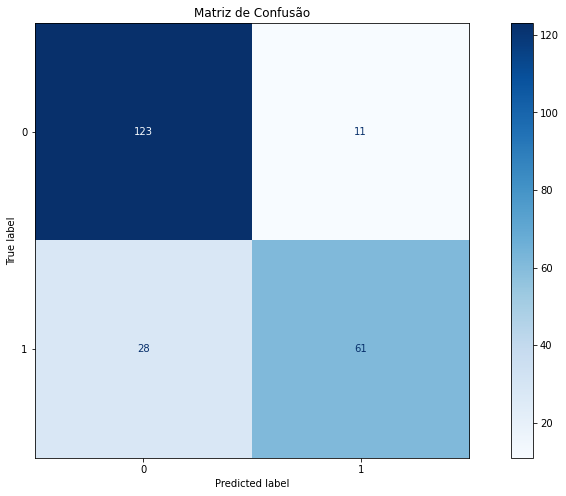

In [0]:
f, ax = plt.subplots(1,1,figsize=(15,8))

plot_confusion_matrix(pipe_final,x_test,y_test,ax=ax,cmap=plt.cm.Blues,values_format='.4g')

ax.set_title('Matriz de Confusão')

plt.show()

In [0]:
## classification report

print(classification_report(y_test,pipe_final.predict(x_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       134
           1       0.85      0.69      0.76        89

    accuracy                           0.83       223
   macro avg       0.83      0.80      0.81       223
weighted avg       0.83      0.83      0.82       223



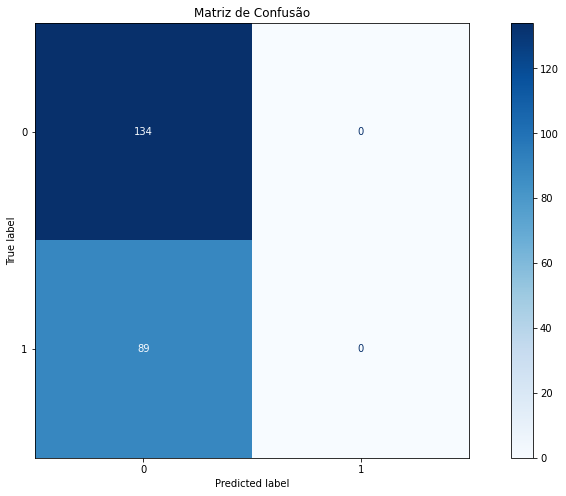

In [0]:
f, ax = plt.subplots(1,1,figsize=(15,8))

plot_confusion_matrix(DummyClassifier(strategy='most_frequent').fit(x_train,y_train),x_test,y_test,ax=ax,cmap=plt.cm.Blues,values_format='.4g')

ax.set_title('Matriz de Confusão')

plt.show()

In [0]:
## classification report

print(classification_report(y_test,DummyClassifier('most_frequent').fit(x_train,y_train).predict(x_test)))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       134
           1       0.00      0.00      0.00        89

    accuracy                           0.60       223
   macro avg       0.30      0.50      0.38       223
weighted avg       0.36      0.60      0.45       223



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


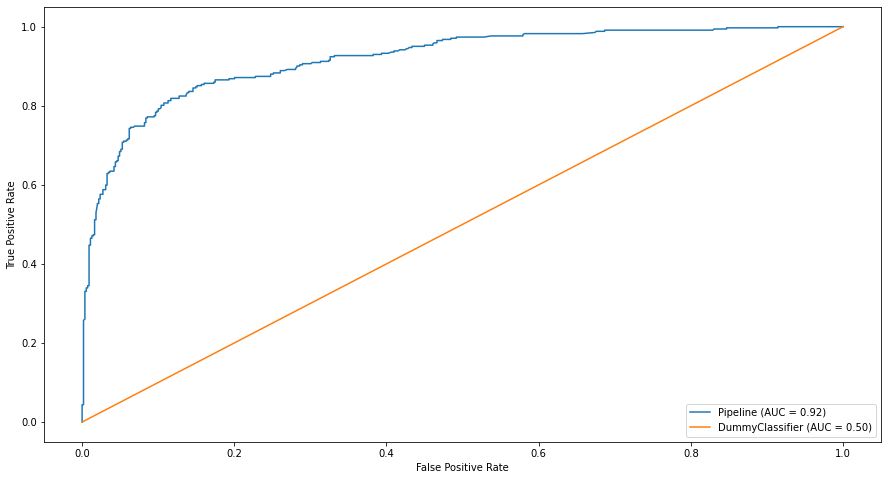

In [0]:
f, ax = plt.subplots(1,1,figsize=(15,8))
plot_roc_curve(pipe_final,x,y,ax=ax)
plot_roc_curve(DummyClassifier('most_frequent').fit(x_train,y_train),x,y,ax=ax)
plt.show()

## KMeans

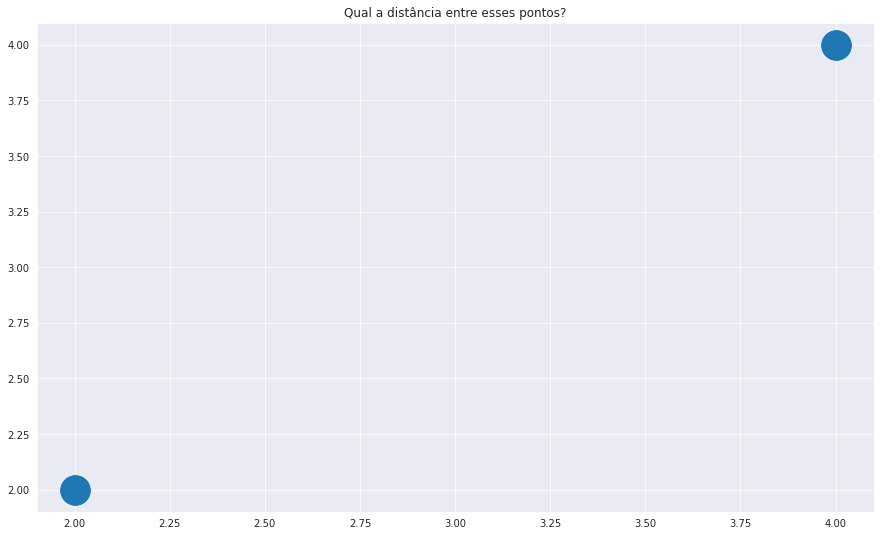

In [0]:
plt.figure(figsize=(15,9))
data = np.array([[2,2],[4,4]])
sns.scatterplot(x = data[:,0], y = data[:,1],s=1000)
plt.title('Qual a distância entre esses pontos?')
plt.show()

In [0]:
np.sqrt((4-2)**2 + (4-2)**2)

2.8284271247461903

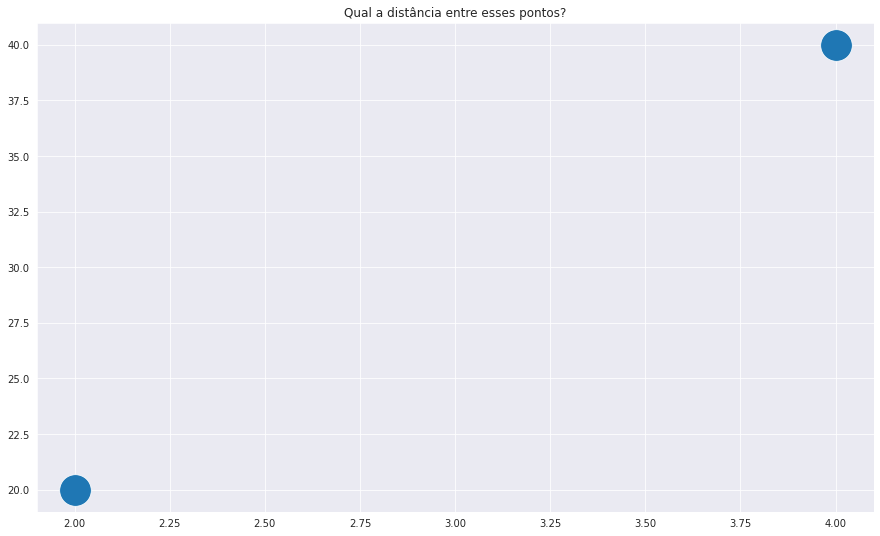

In [0]:
plt.figure(figsize=(15,9))
data = np.array([[2,20],[4,40]])
sns.scatterplot(x = data[:,0], y = data[:,1],s=1000)
plt.title('Qual a distância entre esses pontos?')
plt.show()

In [0]:
np.sqrt((4-2)**2 + (40-20)**2)

20.09975124224178

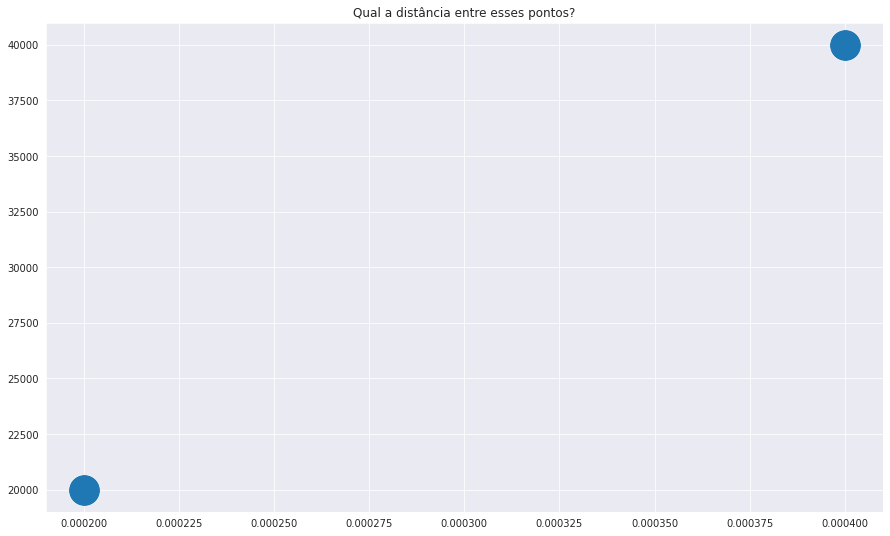

In [0]:
plt.figure(figsize=(15,9))
data = np.array([[0.0002,20000],[0.0004,40000]])
sns.scatterplot(x = data[:,0], y = data[:,1],s=1000)
plt.title('Qual a distância entre esses pontos?')
plt.show()

In [0]:
np.sqrt((0.0004-0.0002)**2 + (40000-20000)**2)

20000.0

In [0]:
## lendo os dados

from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

In [0]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [0]:
## verificando dados nulos

df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [0]:
from sklearn.cluster import KMeans

x = data.data
KMeans(3,random_state=42).fit_predict(x)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [0]:
model = KMeans(3,random_state=42).fit(x)

In [0]:
## criando a coluna cluster no dataframe original

df['cluster'] = KMeans(3,random_state=42).fit_predict(x)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [0]:
## encontrando quantos valores temos em cada cluster

df.cluster.value_counts()

1    429
0    121
2     19
Name: cluster, dtype: int64

In [0]:
df.groupby('cluster').std().transpose()

cluster,0,1,2
mean radius,1.666243,1.846226,2.504150
mean texture,3.820432,4.132357,4.147558
mean perimeter,11.636697,12.593096,18.427075
mean area,187.529027,141.444137,369.697972
mean smoothness,0.011417,0.014393,0.015184
mean compactness,0.052590,0.044410,0.063460
mean concavity,0.069233,0.058007,0.104936
mean concave points,0.029835,0.023625,0.043602
mean symmetry,0.028264,0.026297,0.030642
mean fractal dimension,0.006675,0.007043,0.006021


In [0]:
## procurando a feature onde o centroid está mais localizado

pd.DataFrame(model.cluster_centers_[0])

,0
0,18.528512
1,21.579091
2,122.283471
3,1074.812397
4,0.100261
5,0.141827
6,0.161977
7,0.092081
8,0.191677
9,0.060620


In [0]:
from sklearn.preprocessing import MinMaxScaler

new_x = MinMaxScaler().fit_transform(x)
model_scaled = KMeans(3,random_state=42).fit(new_x)
model_scaled.predict(new_x)

array([1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2,
       2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 2, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2,
       2, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0,
       2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [0]:
## verificando os valores depois do minmax

pd.DataFrame(new_x[0],columns=['MinMax']).assign(original = x[0])

,MinMax,original
0,0.521037,17.990000
1,0.022658,10.380000
2,0.545989,122.800000
3,0.363733,1001.000000
4,0.593753,0.118400
5,0.792037,0.277600
6,0.703140,0.300100
7,0.731113,0.147100
8,0.686364,0.241900
9,0.605518,0.078710


In [0]:
## criando a coluna com associação de cluster usando minmax

df['new_cluster'] = model_scaled.predict(new_x)

In [0]:
## inspecionando

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cluster,new_cluster
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [0]:
## inspecionando as novas associações

df.new_cluster.value_counts()

0    361
1    113
2     95
Name: new_cluster, dtype: int64

In [0]:
## verificando o novo centroid

pd.DataFrame(model.cluster_centers_[0]).assign(scaled = model_scaled.cluster_centers_[0]) 

,0,scaled
0,18.528512,0.257248
1,21.579091,0.287104
2,122.283471,0.248116
3,1074.812397,0.145335
4,0.100261,0.350450
5,0.141827,0.169384
6,0.161977,0.095004
7,0.092081,0.125118
8,0.191677,0.334609
9,0.060620,0.243606


In [0]:
## verificando o novo centroid

pd.DataFrame(model.cluster_centers_[0]).assign(scaled = model_scaled.cluster_centers_[0]).sort_values('scaled')

,0,scaled
13,76.821074,0.029113
16,0.041624,0.053914
12,4.563719,0.058994
10,0.649142,0.064531
19,0.003967,0.077255
6,0.161977,0.095004
23,1546.471074,0.100587
26,0.431358,0.121035
15,0.031328,0.122525
7,0.092081,0.125118


In [0]:
## avaliando a inercia de cada modelo

print(model.inertia_)
print(model_scaled.inertia_)

47336610.421990566
187.03422985789183


In [0]:
## criando dados dummy

from sklearn.datasets import make_blobs

std = 0.0

x,cluster = make_blobs(n_samples=2500,n_features=2,cluster_std=std,random_state=42,centers=[[2,2],[5,5]])
x

array([[2., 2.],
       [2., 2.],
       [2., 2.],
       ...,
       [2., 2.],
       [2., 2.],
       [5., 5.]])

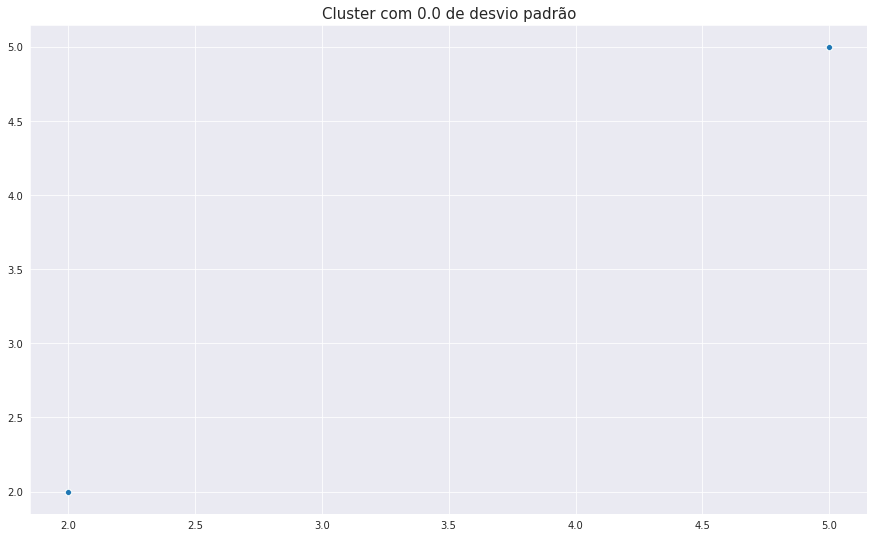

In [0]:
plt.figure(figsize=(15,9))
sns.scatterplot(x = x[:,0], y = x[:,1]);
plt.title(f'Cluster com {std} de desvio padrão',size=15)
plt.show()

In [0]:
## aumentando o desvio padrão

std = 0.1

x,cluster = make_blobs(n_samples=2500,n_features=2,cluster_std=std,random_state=42,centers=[[2,2],[5,5]])
x

array([[1.97659801, 2.04663584],
       [1.93236077, 2.18009404],
       [2.11070807, 1.98796188],
       ...,
       [2.21439441, 2.0633919 ],
       [1.80812288, 1.99734861],
       [4.99241285, 4.83153324]])

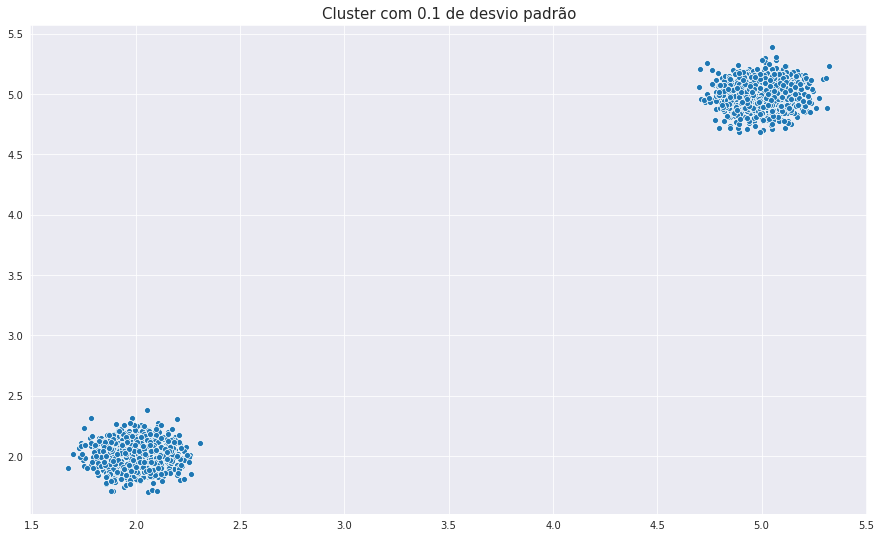

In [0]:
## novo gráfico

plt.figure(figsize=(15,9))
sns.scatterplot(x = x[:,0], y = x[:,1]);
plt.title(f'Cluster com {std} de desvio padrão',size=15)
plt.show()

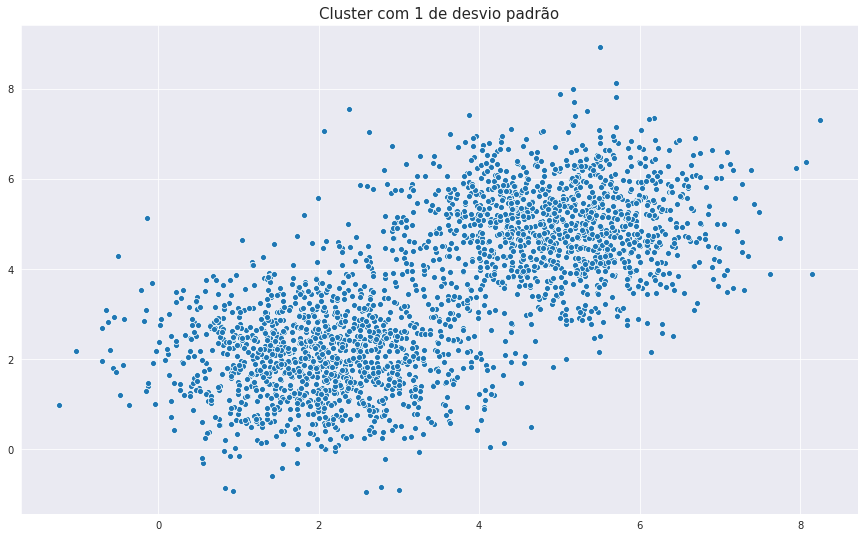

In [0]:
## aumentando o desvio padrão

std = 1

x,cluster = make_blobs(n_samples=2500,n_features=2,cluster_std=std,random_state=42,centers=[[2,2],[5,5]])
plt.figure(figsize=(15,9))
sns.scatterplot(x = x[:,0], y = x[:,1]);
plt.title(f'Cluster com {std} de desvio padrão',size=15)
plt.show()

In [0]:
def val_inertia(std,k):

  ## gerando dados com std
  x, _ = make_blobs(n_samples=2500,n_features=2,cluster_std=std,random_state=42,centers=[[2,2],[5,5]])
  
  ## treinando modelo com K clusters
  model = KMeans(k,random_state=42)
  model.fit(x)

  ## gerando gráfico
  plt.figure(figsize=(15,9))
  sns.scatterplot(x = x[:,0], y = x[:,1])
  plt.scatter(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1],s=150,c='red',marker='X',label = f'Intertia : {model.inertia_}')
  plt.legend()
  plt.title(f'Cluster com {std} de desvio padrão',size=15)
  plt.show()

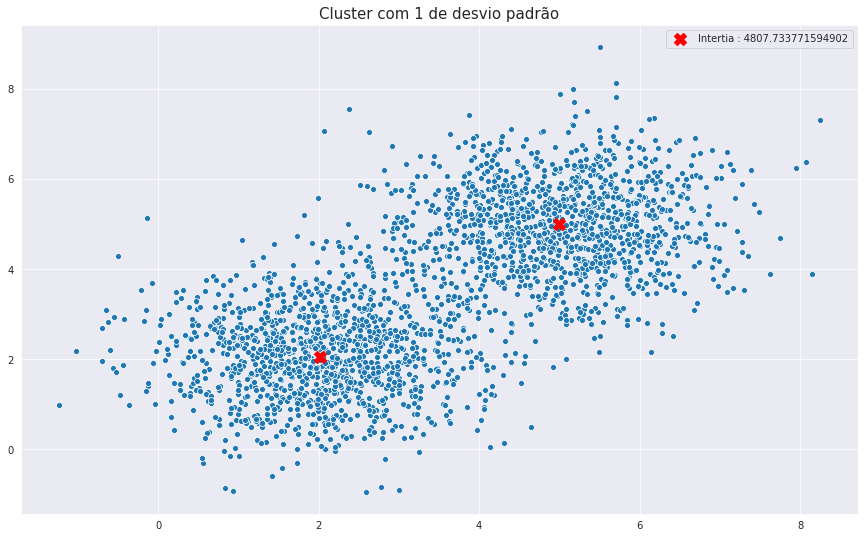

In [0]:
val_inertia(1,2)

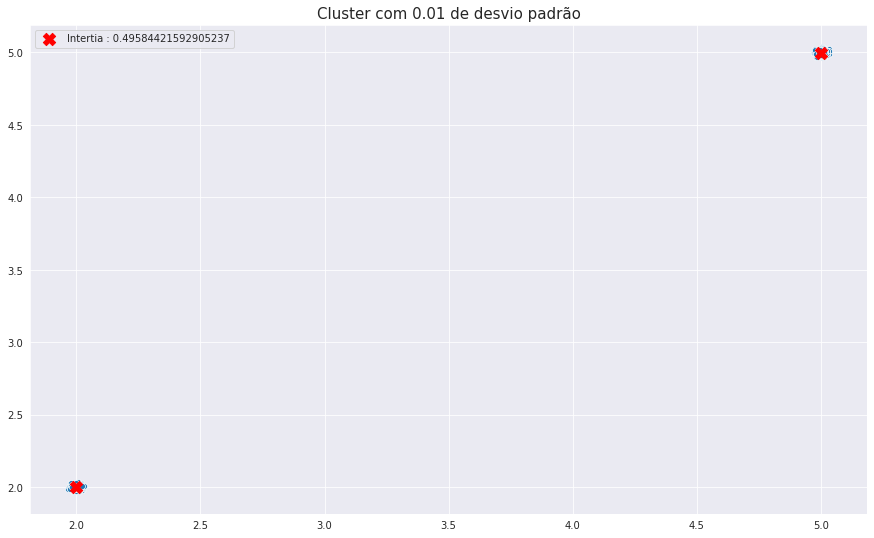

In [0]:
val_inertia(0.01,2)

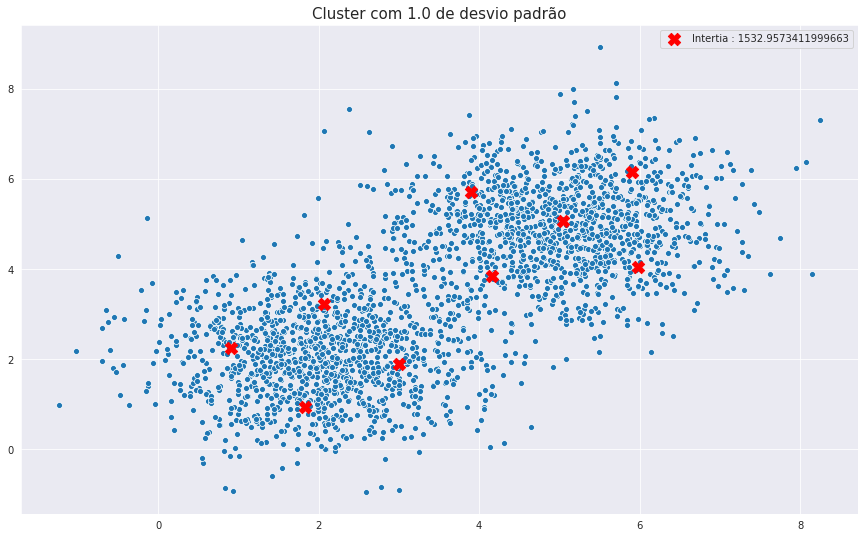

In [0]:
val_inertia(1.0,9)

In [0]:
## voltando para nosso exemplo

from sklearn.preprocessing import StandardScaler

def testar_varios_k(k,method = 'MinMax'):

  if method == 'MinMax':
    x = MinMaxScaler().fit_transform(data.data)
  elif method == 'std':
    x = StandardScaler().fit_transform(data.data)
  else:
    x = data.data

  inertia = []

  for n in range(2,k):

    model = KMeans(n,random_state=42)
    model.fit(x)
    inertia.append(model.inertia_)

  plt.figure(figsize=(15,9)) 
  sns.lineplot(x = list(range(2,k)),y = inertia,label='Curva de Inércia')
  plt.xticks(list(range(2,k)))
  plt.xlabel('Quantidade de Cluster')
  plt.ylabel('Inércia')
  plt.legend()
  plt.title(f'Inércia para vários K',size=15)
  plt.show()


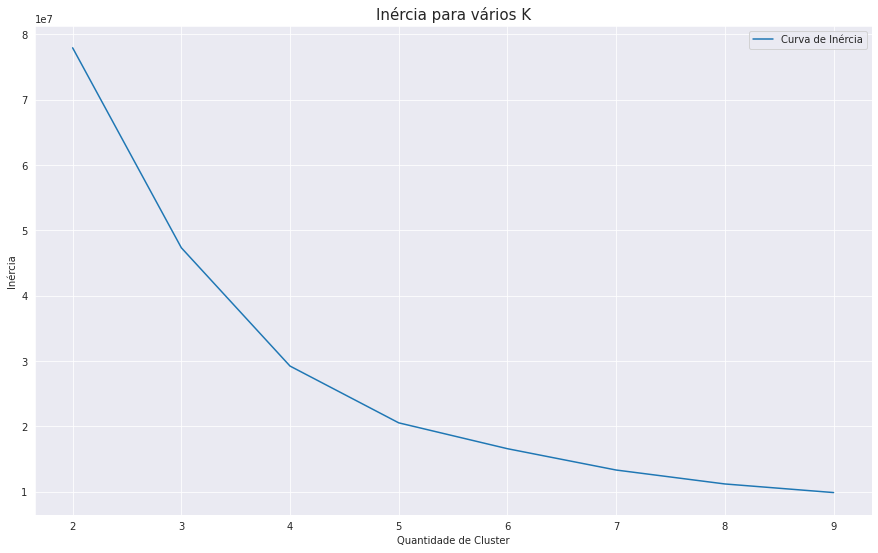

In [0]:
testar_varios_k(10,method='Std')

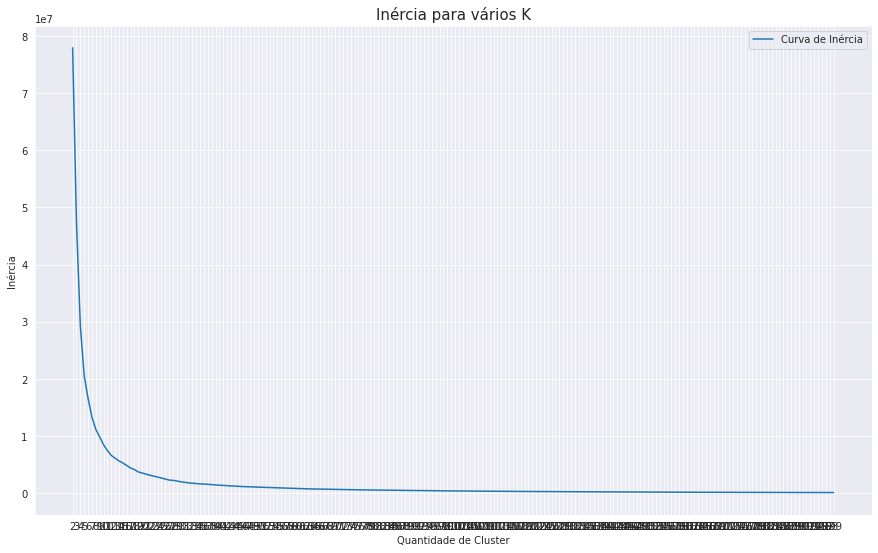

In [0]:
testar_varios_k(200,method='Std')

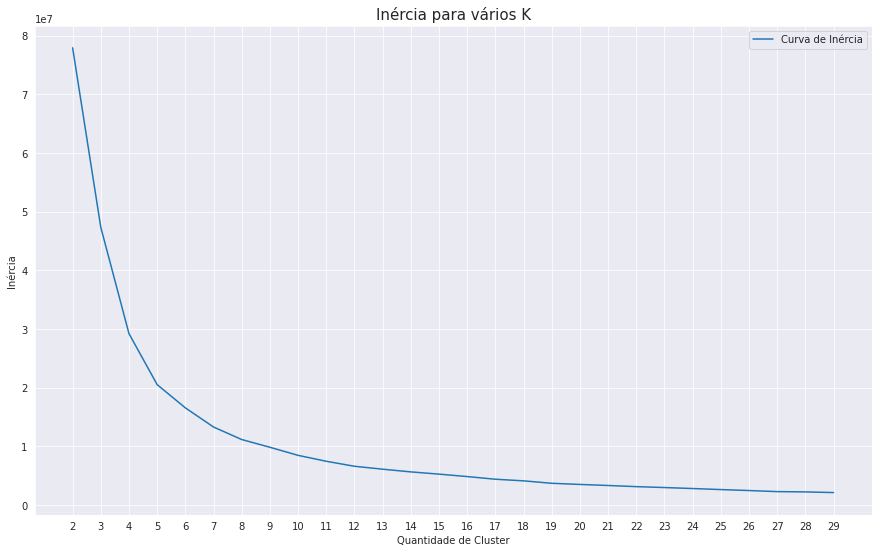

In [0]:
testar_varios_k(30,method='Std')

In [0]:
def val_ch(std,k):

  from sklearn.metrics import calinski_harabasz_score

  ## gerando dados com std
  x, _ = make_blobs(n_samples=2500,n_features=2,cluster_std=std,random_state=42,centers=[[2,2],[5,5]])
  
  ## treinando modelo com K clusters
  model = KMeans(k,random_state=42)
  model.fit(x)

  ## gerando gráfico
  plt.figure(figsize=(15,9))
  sns.scatterplot(x = x[:,0], y = x[:,1])
  plt.scatter(x = model.cluster_centers_[:,0], y = model.cluster_centers_[:,1],
              s=150,c='red',marker='X',
              label = f'CH : {calinski_harabasz_score(x,model.labels_)}\n Inertia : {model.inertia_}')
  plt.legend()
  plt.title(f'Cluster com {std} de desvio padrão',size=15)
  plt.show()

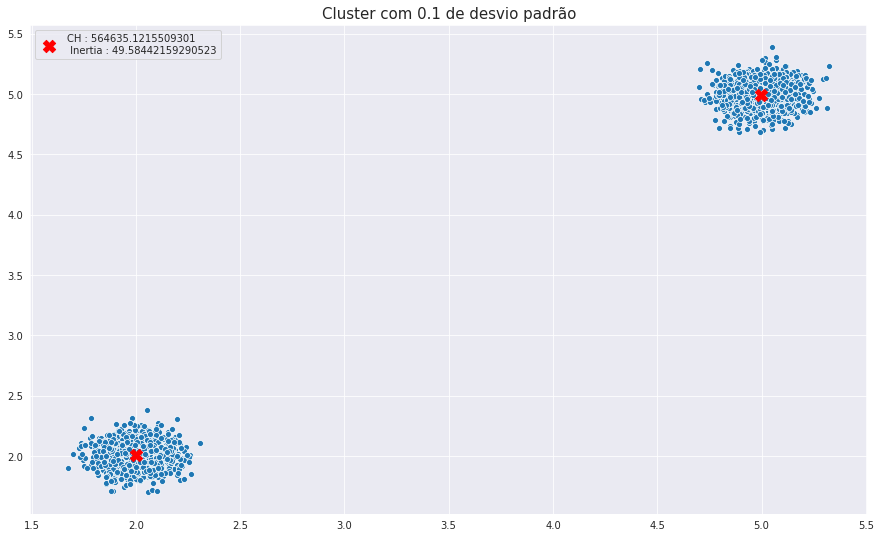

In [0]:
val_ch(0.1,2)

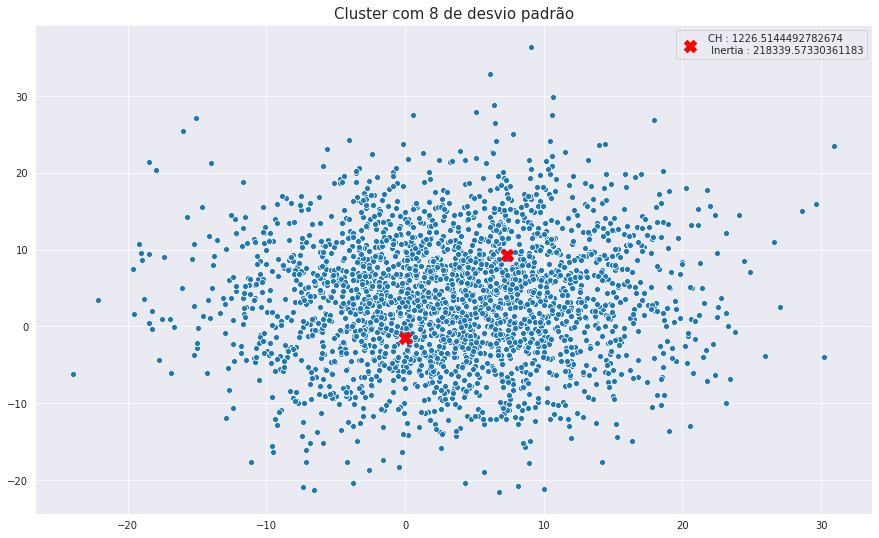

In [0]:
val_ch(8,2)

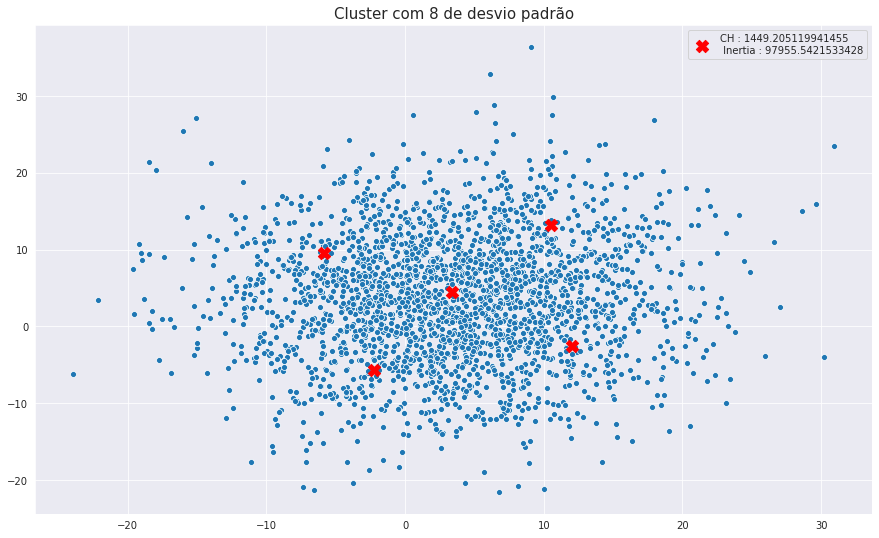

In [0]:
val_ch(8,5)

In [0]:
## voltando para nosso exemplo

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score

def testar_varios_k_ch(k,method = 'MinMax'):

  if method == 'MinMax':
    x = MinMaxScaler().fit_transform(data.data)
  elif method == 'std':
    x = StandardScaler().fit_transform(data.data)
  else:
    x = data.data

  ch = []

  for n in range(2,k):

    model = KMeans(n,random_state=42)
    model.fit(x)
    ch.append(calinski_harabasz_score(x,model.labels_))

  plt.figure(figsize=(15,9)) 
  sns.lineplot(x = list(range(2,k)),y = ch,label='Calinski-Harabasz')
  plt.xticks(list(range(2,k)))
  plt.xlabel('Quantidade de Cluster')
  plt.ylabel('calinski_harabasz_score')
  plt.legend()
  plt.title(f'Calinski-Harabasz para vários K',size=15)
  plt.show()

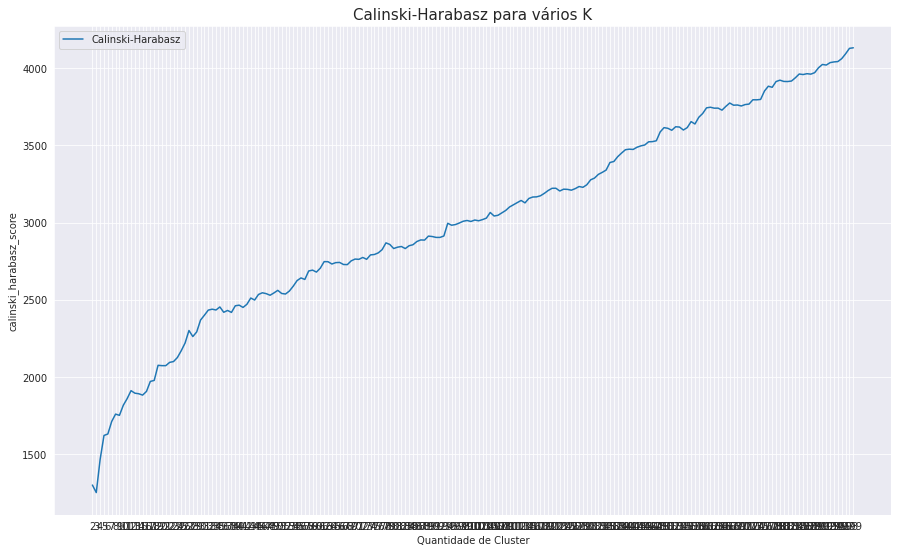

In [0]:
testar_varios_k_ch(200,method='Std')

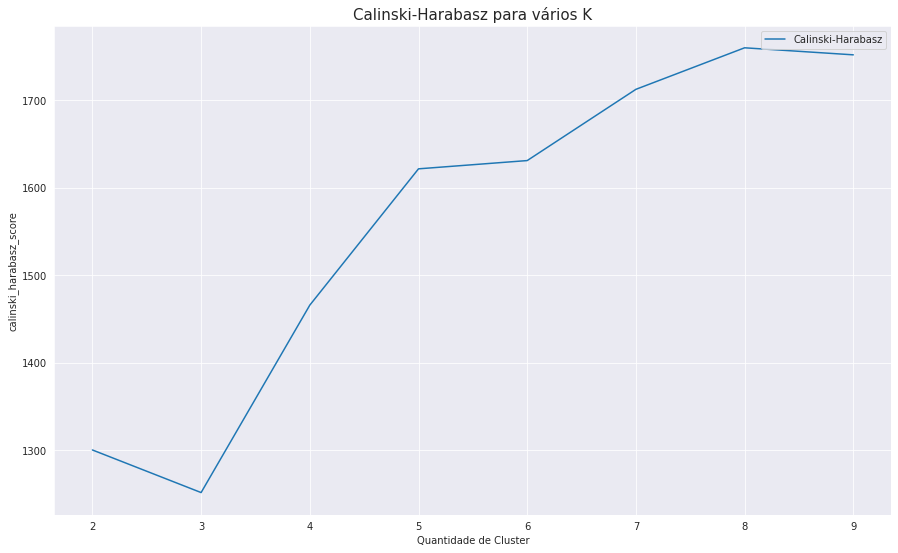

In [0]:
  testar_varios_k_ch(10,method='Std')